# Random Forest in R
#### This is a practice of what's on https://youtu.be/6EXPYzbfLCE
#### Data is from http://archive.ics.uci.edu/ml/datasets/Heart+Disease
#### & http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
#### (processed.cleveland.data)

In [1]:
# Read data
Data <- read.csv('processed.cleveland.data', header=FALSE)

# The data file doesn't come with header. Add it from wdbc.names file.
# colnames(data) <- c("","","",...) works as well.
names(Data)[1]  <- 'age'
names(Data)[2]  <- 'sex'          # 0 = female, 1 = male
names(Data)[3]  <- 'cp'           # chest pain 
                                  #   1 = typical angina, 
                                  #   2 = atypical angina, 
                                  #   3 = non-anginal pain, 
                                  #   4 = asymptomatic
names(Data)[4]  <- 'trestbps'     # resting blood pressure (in mm Hg)
names(Data)[5]  <- 'chol'         # serum cholestoral in mg/dl
names(Data)[6]  <- 'fbs'          # fasting blood sugar if less than 120 mg/dl, 1 = TRUE, 0 = FALSE
names(Data)[7]  <- 'restecg'      # resting electrocardiographic results
                                  #   1 = normal
                                  #   2 = having ST-T wave abnormality
                                  #   3 = showing probable or definite left ventricular hypertrophy
names(Data)[8]  <- 'thalach'      # maximum heart rate achieved
names(Data)[9]  <- 'exang'        # exercise induced angina, 1 = yes, 0 = no
names(Data)[10] <- 'oldpeak'      # ST depression induced by exercise relative to rest
names(Data)[11] <- 'slope'        # the slope of the peak exercise ST segment 
                                  # 1 = upsloping 
                                  # 2 = flat 
                                  # 3 = downsloping 
names(Data)[12] <- 'ca'           # number of major vessels (0-3) colored by fluoroscopy
names(Data)[13] <- 'thal'         # this is short of thalium heart scan
                                  # 3 = normal (no cold spots)
                                  # 6 = fixed defect (cold spots during rest and exercise)
                                  # 7 = reversible defect (when cold spots only appear during exercise)
names(Data)[14] <- 'hd'           # (the predicted attribute) - diagnosis of heart disease 
                                  # 0 if less than or equal to 50% diameter narrowing
                                  # 1 if greater than 50% diameter narrowing

# We will use just the first 14 columns.
Data = Data[,1:14]
# Cursory check
Data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [2]:
# this shows that we need to tell R which columns contain factors it also shows us that there are some missing values. 
# There are ''?'s in the dataset.
str(Data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : num  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num  3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 5 levels "?","0.0","1.0",..: 2 5 4 2 2 2 4 2 3 2 ...
 $ thal    : Factor w/ 4 levels "?","3.0","6.0",..: 3 2 4 2 2 2 2 2 4 4 ...
 $ hd      : int  0 2 1 0 0 0 3 0 2 1 ...


In [3]:
## Now add factors for variables that are factors and clean up the factors that had missing data.
Data[Data$sex == 0,]$sex <- "F"
Data[Data$sex == 1,]$sex <- "M"
Data$sex     <- as.factor(Data$sex)

Data$cp      <- as.factor(Data$cp)
Data$fbs     <- as.factor(Data$fbs)
Data$restecg <- as.factor(Data$restecg)
Data$exang   <- as.factor(Data$exang)
Data$slope   <- as.factor(Data$slope)

Data$ca <-as.character(Data$ca)
Data[Data$ca == '?',]$ca     <- NA
Data$ca <-as.factor(Data$ca)
                                    
Data$thal <-as.character(Data$thal)
Data[Data$thal == '?',]$thal <- NA
Data$thal <-as.factor(Data$thal)

## This next line replaces 0 and 1 with "Healthy" and "Unhealthy"
Data$hd <- ifelse(test=Data$hd == 0, yes="Healthy", no="Unhealthy")
Data$hd <- as.factor(Data$hd)       # Now convert to a factor

In [4]:
str(Data)
# This shows that the correct columns are factors and we've replaced '?'s with NAs 
# because '?' no longer appears in the list of factors for 'ca' and 'thal'.

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 4 levels "0.0","1.0","2.0",..: 1 4 3 1 1 1 3 1 2 1 ...
 $ thal    : Factor w/ 3 levels "3.0","6.0","7.0": 2 1 3 1 1 1 1 1 3 3 ...
 $ hd      : Factor w/ 2 levels "Healthy","Unhealthy": 1 2 2 1 1 1 2 1 2 2 ...


In [5]:
# Cursory check
Data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,M,1,145,233,1,2,150,0,2.3,3,0.0,6.0,Healthy
67,M,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Unhealthy
67,M,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Unhealthy
37,M,3,130,250,0,0,187,0,3.5,3,0.0,3.0,Healthy
41,F,2,130,204,0,2,172,0,1.4,1,0.0,3.0,Healthy
56,M,2,120,236,0,0,178,0,0.8,1,0.0,3.0,Healthy
62,F,4,140,268,0,2,160,0,3.6,3,2.0,3.0,Unhealthy
57,F,4,120,354,0,0,163,1,0.6,1,0.0,3.0,Healthy
63,M,4,130,254,0,2,147,0,1.4,2,1.0,7.0,Unhealthy


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



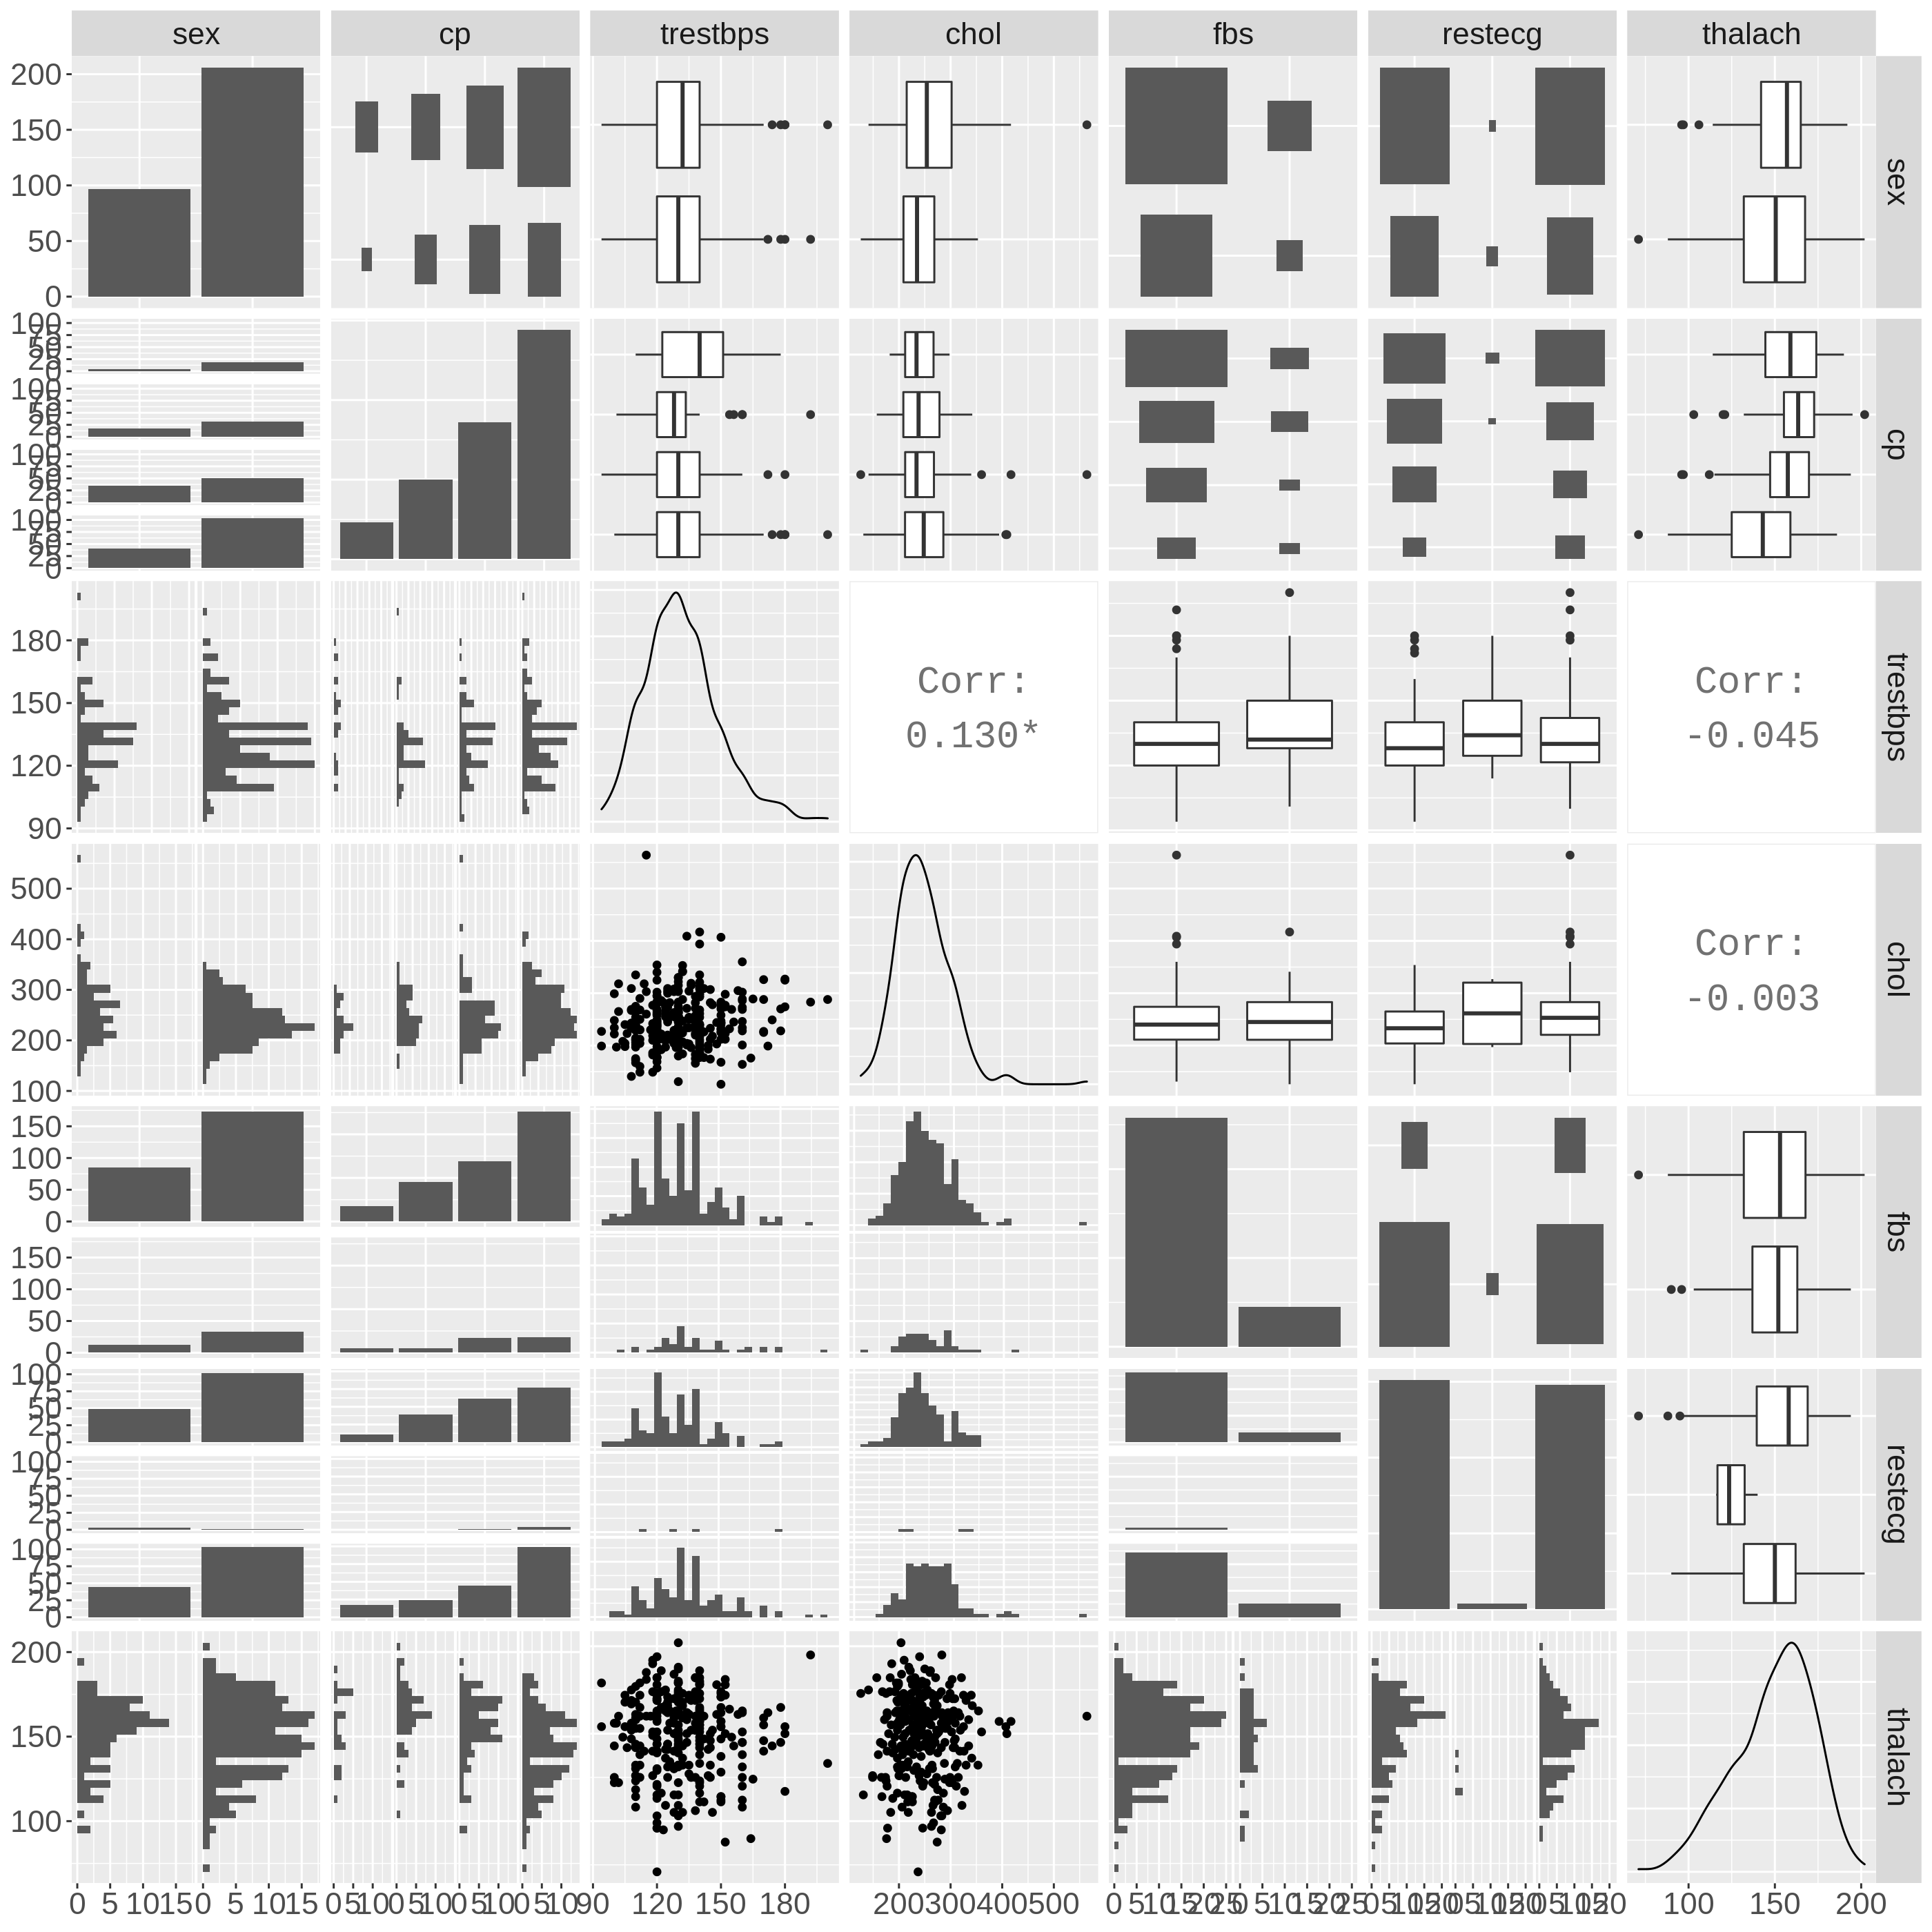

In [6]:
# Matrix plot
library(GGally)
scol = 2    # starting column number (index)
ncol = 7    # the number of columns to plot
psize   = 2.0*(ncol)    # 2" per column
options(repr.plot.height=psize, repr.plot.width=psize,repr.plot.res = 200)
ggpairs(Data[,scol:(scol+ncol-1)], diag = list(continuous = "densityDiag"), upper = list(continuous = wrap('cor', size=7))) +
                                                                                        theme(text = element_text(size=20))

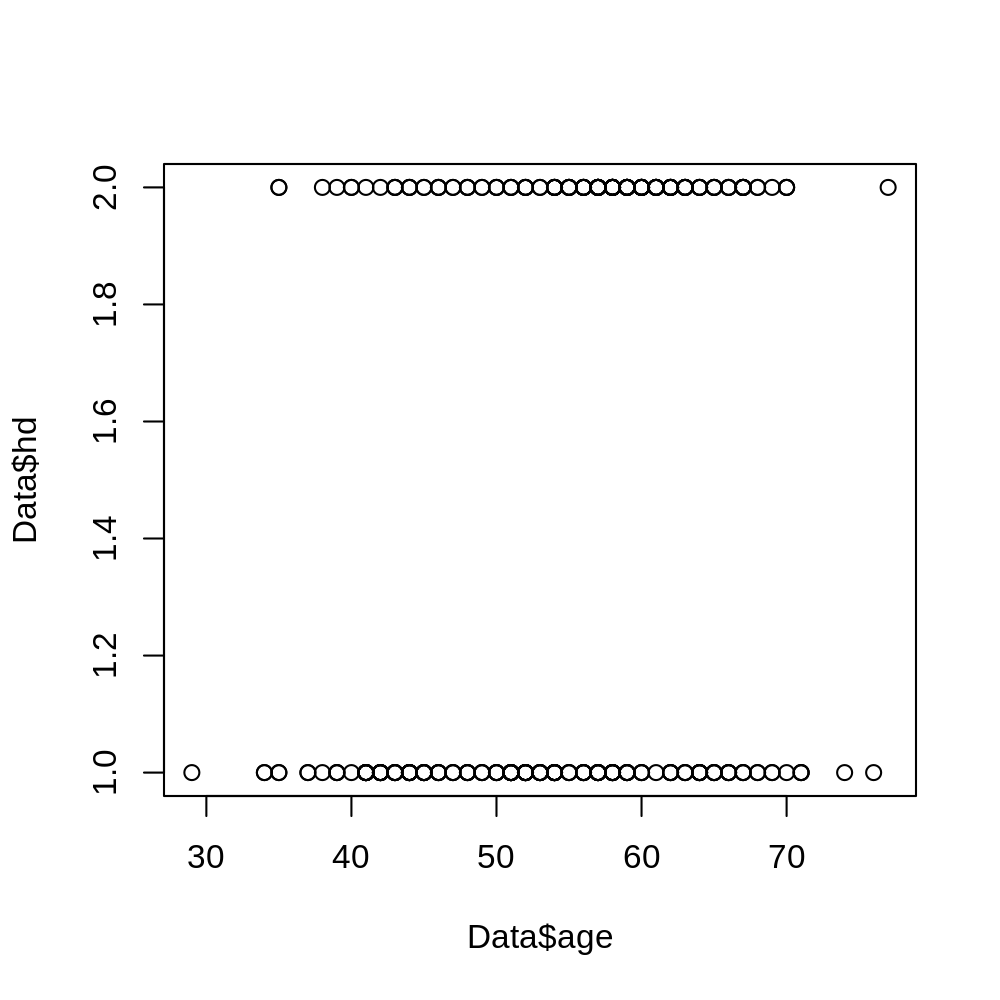

In [7]:
# Plot 'Diagnosis'(y) vs 'radius'(x)
options(repr.plot.height=5, repr.plot.width=5, repr.plot.res = 200)
plot(Data$age, Data$hd)

In [25]:
# Predict heart disease using the rest of data
# Load the randomForest library.
library(randomForest)

# Set a seed for the random number generator so that I get the same results later.
set.seed(42)

# NOTE: For most machine learning methods, you need to divide the data manually into a "training" set and a "test" set. 
# This allows you to train the method using the training data, and then test it on data it was not originally trained on. 
#
# In contrast, Random Forests split the data into "training" and "test" sets for you. 
# This is because Random Forests use bootstrapped data, and thus, not every sample is used to build every tree. 
# The "training" dataset is the bootstrapped data and the "test" dataset is the remaining samples. 
# The remaining samples are called the "Out-Of-Bag" (OOB) data.

# impute any missing values in the training set using proximities
Data.imputed <- rfImpute(hd ~ ., data = Data, iter=6)

# NOTE: iter = the number of iterations to run. Breiman says 4 to 6 iterations is usually good enough. 
# With this dataset, when we set iter=6, OOB-error bounces around between 17% and 18%. When we set iter=20, 
#   set.seed(42)
#   data.imputed <- rfImpute(hd ~ ., data = data, iter=20)
# we get values a little better and a little worse, so doing more iterations doesn't improve the situation.
#
# NOTE: If you really want to micromanage how rfImpute(), you can change the number of trees it makes (the default is 300)
# and the number of variables that it will consider at each step.

# Now we are ready to build a random forest.

# NOTE: If the thing we're trying to predict (in this case it is whether or not someone has heart disease) is a 
# continuous number (i.e. "weight" or "height"), then by default, randomForest() will set "mtry", 
# the number of variables to consider at each step, to the total number of variables divided by 3 (rounded down), or to 1 
# (if the division results in a value less than 1).
# If the thing we're trying to predict is a "factor" (i.e. either "yes/no" or "ranked"), 
# then randomForest() will set mtry to the square root of the number of variables (rounded down to the next integer value).

# In this example, "hd", the thing we are trying to predict, is a factor and there are 13 variables. 
# So by default, randomForest() will set mtry = sqrt(13) = 3.6 rounded down = 3
# Also, by default random forest generates 500 trees (NOTE: rfImpute() only generates 300 tress by default)

model <- randomForest(hd ~ ., data=Data.imputed, proximity=TRUE)

ntree      OOB      1      2
  300:  17.49% 12.80% 23.02%
ntree      OOB      1      2
  300:  16.83% 14.02% 20.14%
ntree      OOB      1      2
  300:  17.82% 13.41% 23.02%
ntree      OOB      1      2
  300:  17.49% 14.02% 21.58%
ntree      OOB      1      2
  300:  17.16% 12.80% 22.30%
ntree      OOB      1      2
  300:  18.15% 14.63% 22.30%


In [26]:
## RandomForest returns all kinds of things
model 
# gives us an overview of the call, along with...
# 1) The OOB error rate for the forest with ntree trees. 
#    In this case ntree=500 by default
# 2) The confusion matrix for the forest with ntree trees.
#    The confusion matrix is laid out like this:
#          
#                Healthy                      Unhealthy
#          --------------------------------------------------------------
# Healthy  | Number of healthy people   | Number of healthy people      |
#          | correctly called "healthy" | incorectly called "unhealthy" |
#          | by the forest.             | by the forest                 |
#          --------------------------------------------------------------
# Unhealthy| Number of unhealthy people | Number of unhealthy peole     |
#          | incorrectly called         | correctly called "unhealthy"  |
#          | "healthy" by the forest    | by the forest                 |
#          --------------------------------------------------------------


Call:
 randomForest(formula = hd ~ ., data = Data.imputed, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 16.83%
Confusion matrix:
          Healthy Unhealthy class.error
Healthy       142        22   0.1341463
Unhealthy      29       110   0.2086331

In [11]:
# Now check to see if the random forest is actually big enough...
# Up to a point, the more trees in the forest, the better. 
# You can tell when you've made enough when the OOB no longer improves.
oob.error.data <- data.frame(
    Trees=rep(1:nrow(model$err.rate), times=3),
    Type=rep(c("OOB", "Healthy", "Unhealthy"), each=nrow(model$err.rate)),
    Error=c(model$err.rate[,"OOB"], 
            model$err.rate[,"Healthy"], 
            model$err.rate[,"Unhealthy"]) )

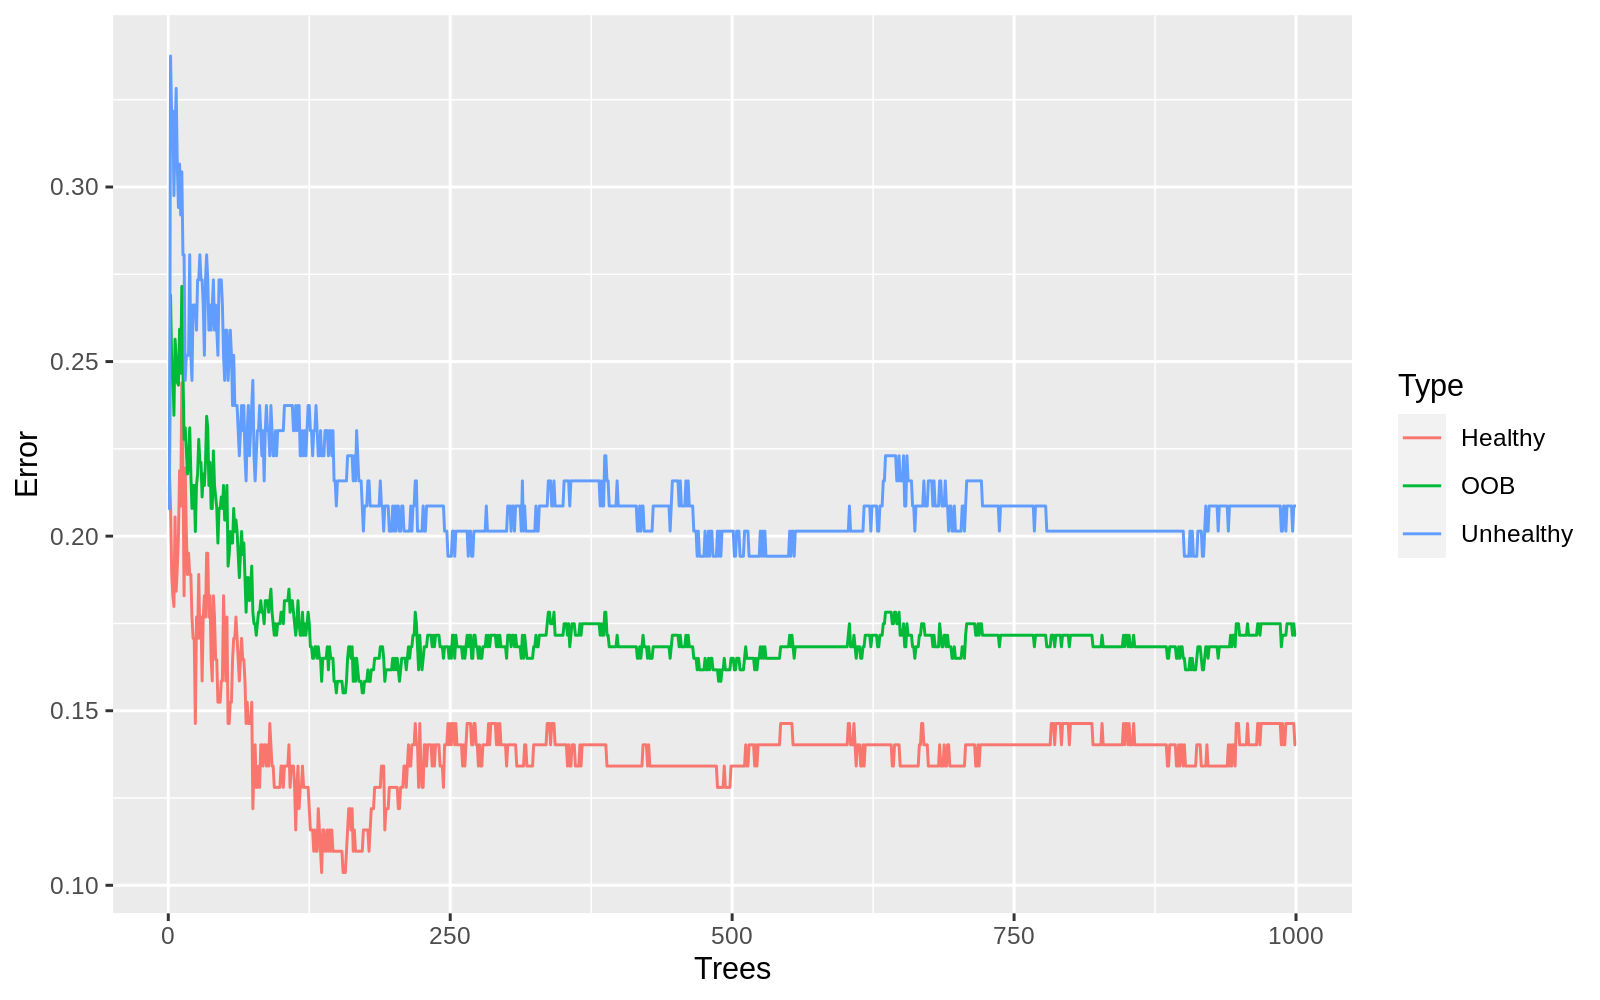

In [31]:
library(cowplot)
library(ggplot2)
options(repr.plot.height=5, repr.plot.width=8, repr.plot.res = 200)
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
# ggsave("oob_error_rate_500_trees.pdf")

# Blue line  = The error rate specifically for calling "Unheathly" patients that are OOB.
# Green line = The overall OOB error rate.
# Red line   = The error rate specifically for calling "Healthy" patients that are OOB.


Call:
 randomForest(formula = hd ~ ., data = Data.imputed, ntree = 1000,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 17.16%
Confusion matrix:
          Healthy Unhealthy class.error
Healthy       141        23   0.1402439
Unhealthy      29       110   0.2086331

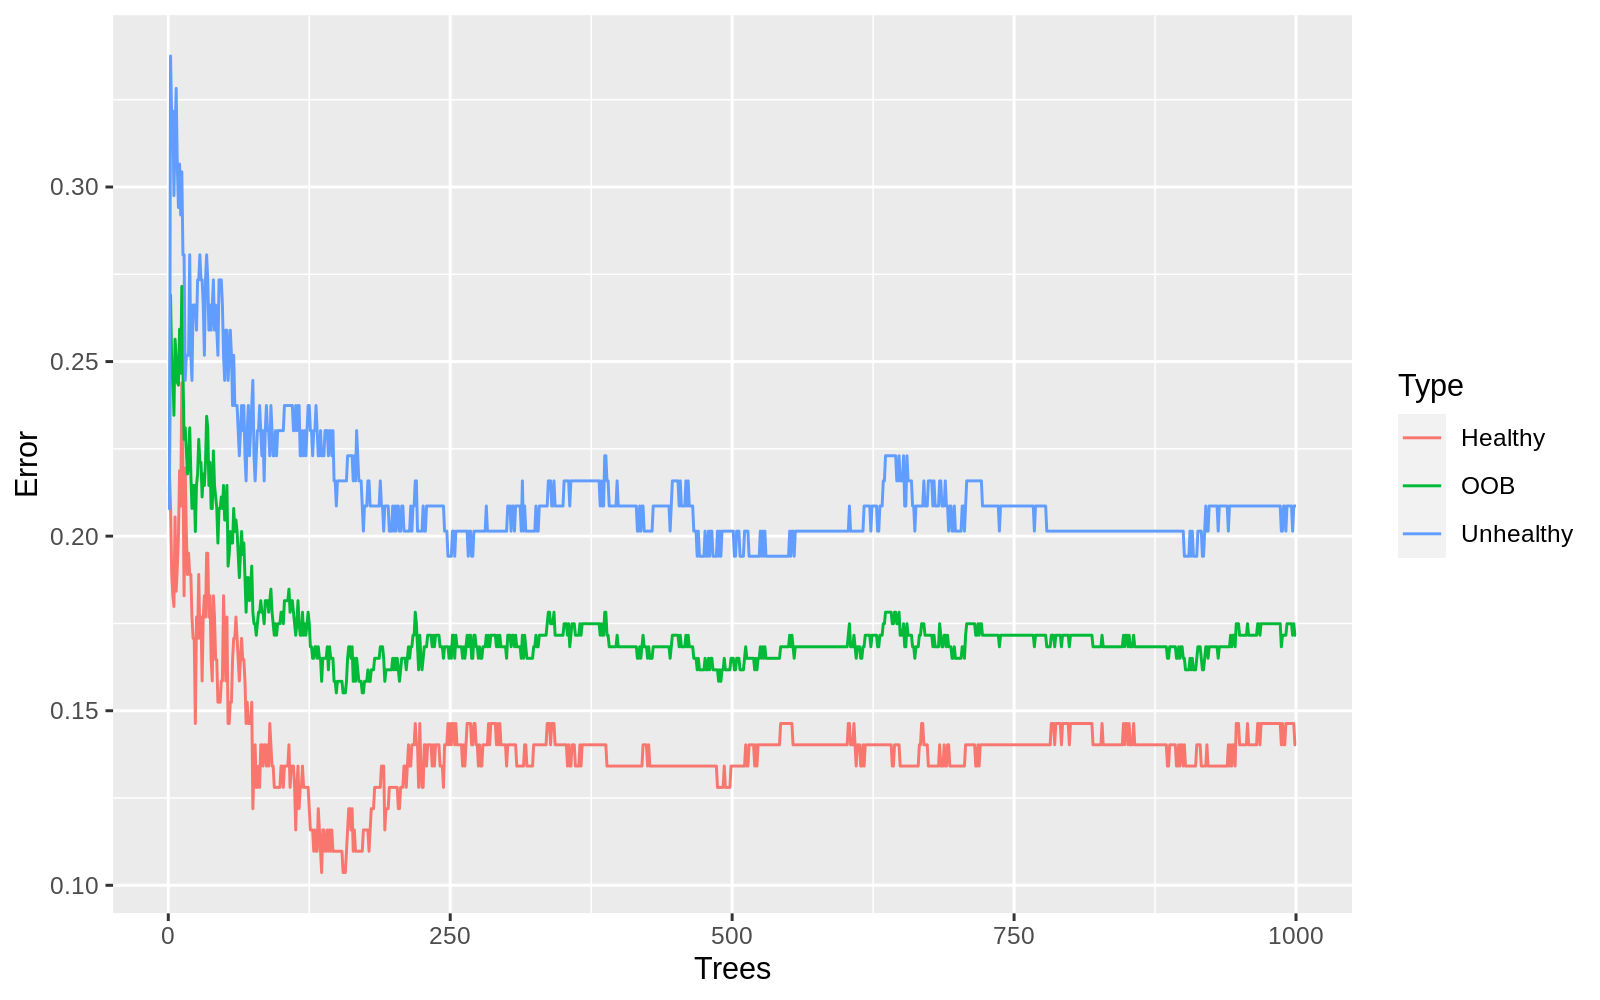

In [13]:
# NOTE: After building a random forest with 500 tress, the graph does not make it clear that 
# the OOB-error has settled on a value or, if we added more trees, it would continue to decrease.
# So we do the whole thing again, but this time add more trees.
model <- randomForest(hd ~ ., data=Data.imputed, ntree=1000, proximity=TRUE)
model

oob.error.data <- data.frame(
    Trees=rep(1:nrow(model$err.rate), times=3),
    Type=rep(c("OOB", "Healthy", "Unhealthy"), each=nrow(model$err.rate)),
    Error=c(model$err.rate[,"OOB"], 
            model$err.rate[,"Healthy"], 
            model$err.rate[,"Unhealthy"]) )

options(repr.plot.height=5, repr.plot.width=8, repr.plot.res = 200)
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
# ggsave("oob_error_rate_1000_trees.pdf")


# After building a random forest with 1,000 trees, we get the same OOB-error 16.5% and we can see convergence in the graph.
# So we could have gotten away with only 500 trees, but we wouldn't have been sure that number was enough.

In [22]:
# If we want to compare this random forest to others with different values for mtry
# (to control how many variables are considered at each step)
# mtry is the number of variables at each internal node in the tree. In the above examples, it was 3
# (No. of variables tried at each split: 3)
oob.values <- vector(length=10)
for(i in 1:10) {
  temp.model <- randomForest(hd ~ ., data=Data.imputed, mtry=i, ntree=1000)
  oob.values[i] <- temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values

## find the minimum error
min(oob.values)

## find the optimal value for mtry...
which(oob.values == min(oob.values))

## create a model for proximities using the best value for mtry
model <- randomForest(hd ~ ., 
                      data=Data.imputed,
                      ntree=1000, 
                      proximity=TRUE, 
                      mtry=which(oob.values == min(oob.values)))


[1] 0.1650165 0.1683168 0.1617162 0.1650165 0.1782178 0.1749175 0.1848185
 [8] 0.1914191 0.1980198 0.1947195

[1] 0.1617162

[1] 3

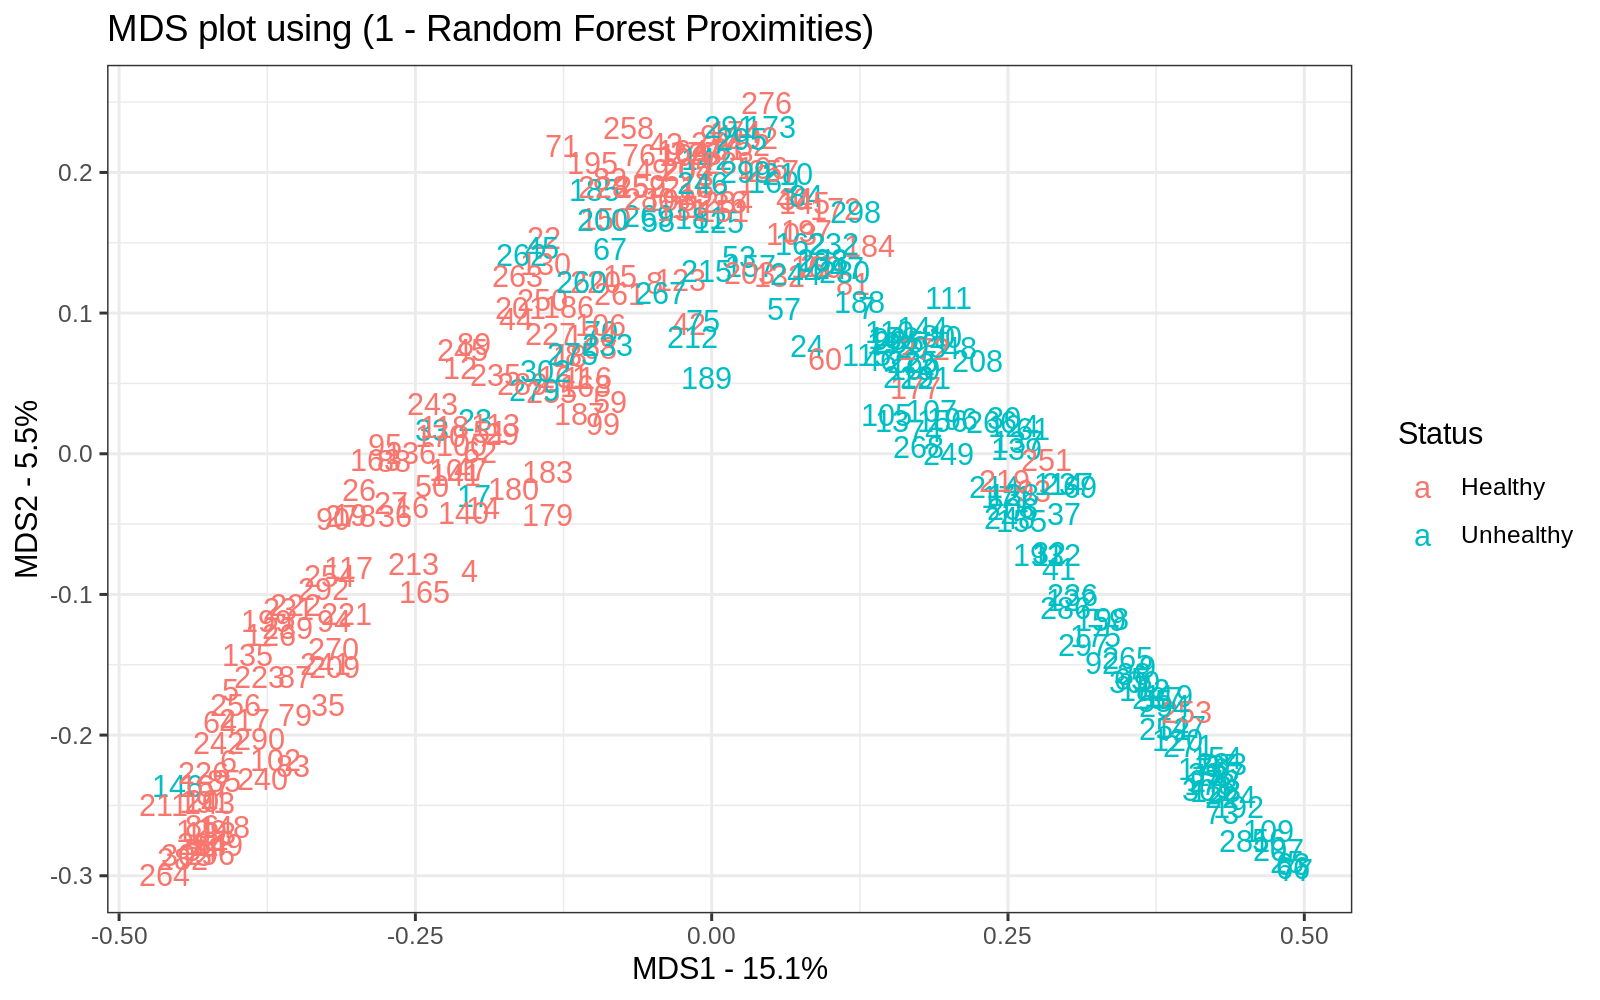

In [32]:
# Now let's create an MDS-plot to show how the samples are related to each other.
#
# Start by converting the proximity matrix into a distance matrix.
distance.matrix <- as.dist(1-model$proximity)

mds.stuff <- cmdscale(distance.matrix, eig=TRUE, x.ret=TRUE)

# calculate the percentage of variation that each MDS axis accounts for...
mds.var.per <- round(mds.stuff$eig/sum(mds.stuff$eig)*100, 1)

# now make a fancy looking plot that shows the MDS axes and the variation:
mds.values <- mds.stuff$points
mds.data <- data.frame(Sample=rownames(mds.values),
  X=mds.values[,1],
  Y=mds.values[,2],
  Status=Data.imputed$hd)

ggplot(data=mds.data, aes(x=X, y=Y, label=Sample)) + 
  geom_text(aes(color=Status)) +
  theme_bw() +
  xlab(paste("MDS1 - ", mds.var.per[1], "%", sep="")) +
  ylab(paste("MDS2 - ", mds.var.per[2], "%", sep="")) +
  ggtitle("MDS plot using (1 - Random Forest Proximities)")
# ggsave(file="random_forest_mds_plot.pdf")

In [28]:
# Predict y using a new x.
new_data = Data.imputed[2,2:14]
predict(model, new_data, type='response')    # type='response' gives probability of Diagnosis M

2 
Unhealthy 
Levels: Healthy Unhealthy